# ***LAB # 04***

Files found: ['//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch7.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch6.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch9.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch8.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch5.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch0.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch2.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch1.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch3.jpg']
time= 0 hr   Scratch area= 12717 pix²
time= 1 hr   Scratch area= 14417 pix²
time= 2 hr   Scratch area= 9337 pix²
time= 3 hr   Scratch area= 10957 pix²
time= 4 hr   Scratch area= 16105 pix²
time= 5 hr   Scratch area= 33426 pix²
time= 6 hr   Scratch area= 24106 pix²
time= 7 hr   Scratch area= 27683 pix²
time= 8 hr   Scratch area= 21123 pix²
y =  2090.4833333333336 x  +  105

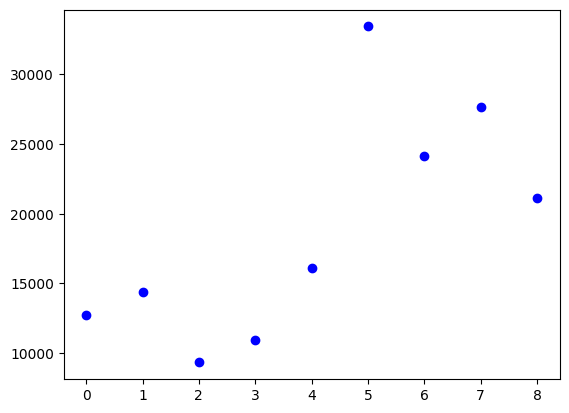

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob
time = 0
time_list = []
area_list = []
# Update the path and pattern based on your file structure
path = "//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/*"
# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

for file in files:
    img = io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)


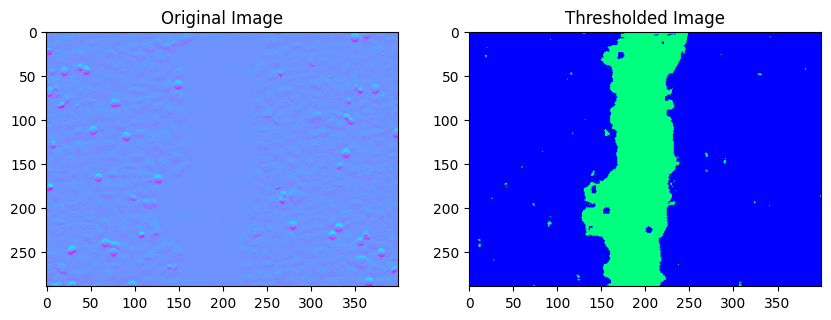

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='cool')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='winter')
plt.title('Thresholded Image')

plt.show()



Files found: ['//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch7.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch6.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch9.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch8.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch5.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch0.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch2.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch1.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch3.jpg']
time= 0 hr   Scratch area= 12717 pix²
time= 1 hr   Scratch area= 14417 pix²
time= 2 hr   Scratch area= 9337 pix²
time= 3 hr   Scratch area= 10957 pix²
time= 4 hr   Scratch area= 16105 pix²
time= 5 hr   Scratch area= 33426 pix²
time= 6 hr   Scratch area= 24106 pix²
time= 7 hr   Scratch area= 27683 pix²
time= 8 hr   Scratch area= 21123 pix²


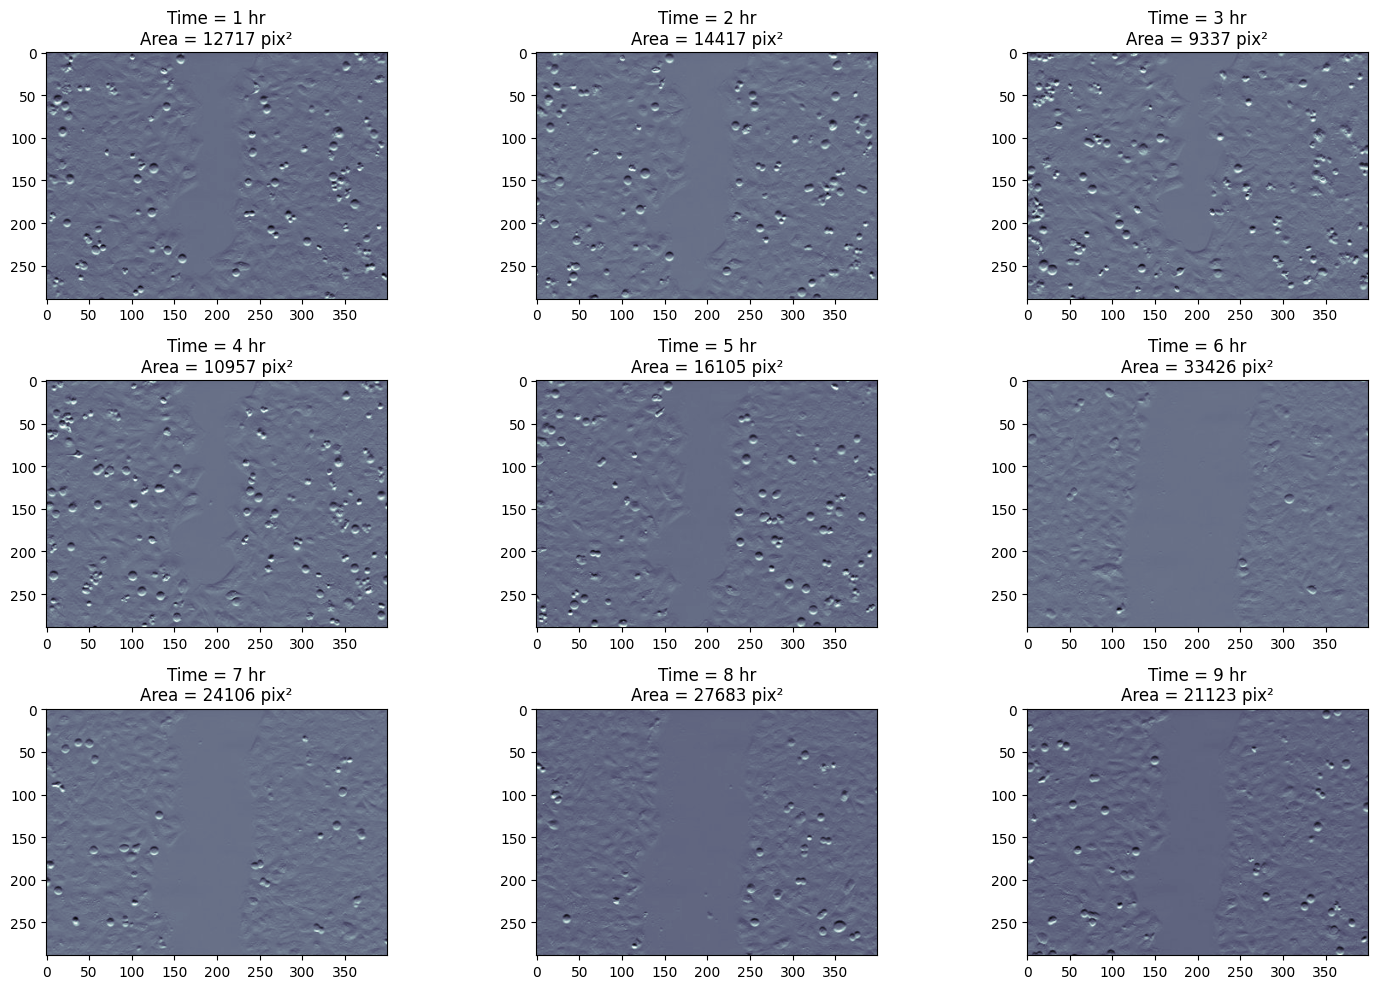

y =  2090.4833333333336 x  +  10512.62222222222
R² =  0.48479227495713906


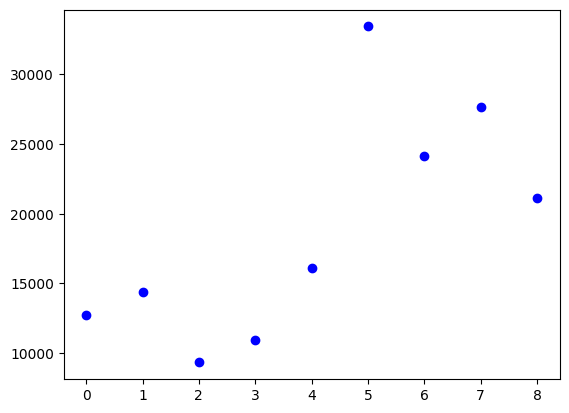

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob
import math

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = "//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/*"

# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

# Calculate the number of rows and columns for the subplot grid
num_cols = int(math.ceil(math.sqrt(num_images)))
num_rows = int(math.ceil(num_images / num_cols))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, file in enumerate(files):
    img = io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    # Calculate the subplot index
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Display the original image and the thresholded image in the subplot
    axes[row_idx, col_idx].imshow(img, cmap='bone')
    axes[row_idx, col_idx].set_title(f'Time = {time} hr\nArea = {scratch_area} pix²')

# Remove any empty subplots
for idx in range(num_images, num_rows * num_cols):
    axes.flatten()[idx].remove()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)


Files found: ['//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch7.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch6.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch9.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch8.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch5.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch0.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch2.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch1.jpg', '//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/Scratch3.jpg']
time= 0 hr   Scratch area= 12717 pix²
time= 1 hr   Scratch area= 14417 pix²
time= 2 hr   Scratch area= 9337 pix²
time= 3 hr   Scratch area= 10957 pix²
time= 4 hr   Scratch area= 16105 pix²
time= 5 hr   Scratch area= 33426 pix²
time= 6 hr   Scratch area= 24106 pix²
time= 7 hr   Scratch area= 27683 pix²
time= 8 hr   Scratch area= 21123 pix²


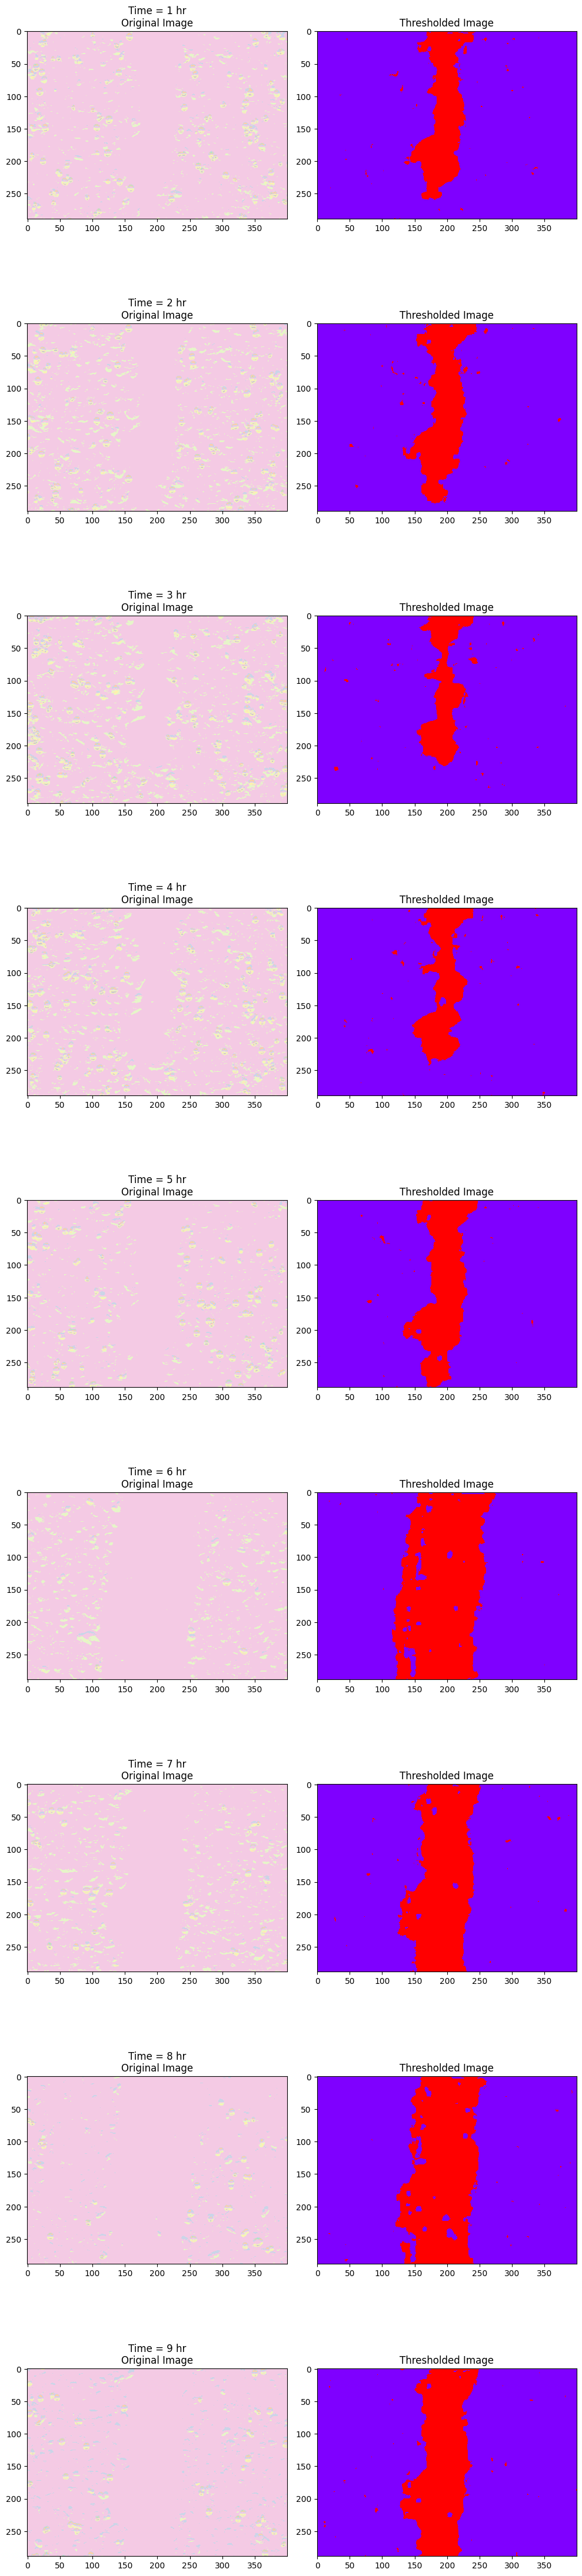

y =  2090.4833333333336 x  +  10512.62222222222
R² =  0.48479227495713906


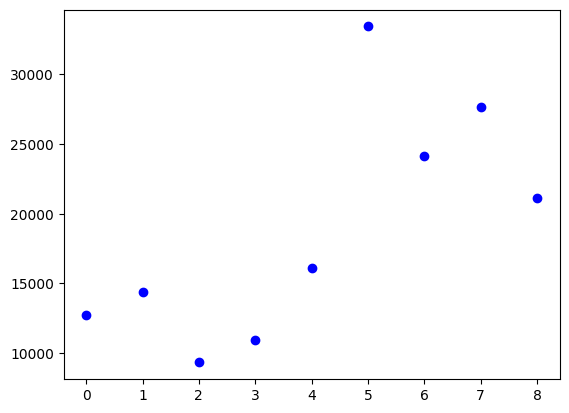

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = "//content/drive/MyDrive/DIP LAB 04 DATAFILES UMAIMA/*"

# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))

for idx, file in enumerate(files):
    img = io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    # Display the original image in the left column
    axes[idx, 0].imshow(img, cmap='Pastel2')
    axes[idx, 0].set_title(f'Time = {time} hr\nOriginal Image')

    # Display the thresholded image in the right column with a different color
    axes[idx, 1].imshow(binary, cmap='rainbow',  interpolation ='none')
    axes[idx, 1].set_title('Thresholded Image')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)